**scikit-learn의 perceptron 실습**

1.코드 흐름

(1) (데이터 측면) 데이터 불러오기.

(2) (데이터 측면) 불러온 데이터를 훈련데이터와 테스트 데이터로 구분.

(3) (모델 측면) sklearn 라이브러리의 퍼셉트론 모델 불러오기.

(4) (학습 과정) 모델 학습.

(5) (성능 평가) 테스트 데이터를 이용한 모델의 성능 평가 및 시각화.

**데이터 설명**

scikit-learn에서 제공하는 필기체 숫자 데이터를 활용. 해당 데이터는 0부터 9까지 총 10개의 숫자의 필기체 이미지를 수집한 것으로 총 1797개의 이미지로 구성되어 있으며, 개별 이미지는 8X8=64개의 특성으로 표시됨. 개별 특성은 픽셀을 의미하며 0-16까지의 정수값이 부여됨. 

퍼셉트론은 학습을 통해 0 - 9의 숫자에 대한 필기체 이미지를 인식하여 주어진 이미지의 소속 클래스(숫자)를 예측하는 **분류** 작업을 수행.

**모델의 학습과 예측**

train_test_split을 이용하여 훈련용 데이터와 테스트용 데이터를 확보한 후 fit() 명령으로 모델을 학습하고, predict() 명령으로 예측 작업을 수행.

**분류 성능 평가와 시각화**

1."classification_report"

sklearn.metrics 패키지에서 제공하는 기능으로 precision, recall, f1-score 등 다양한 측도를 이용하여 클래스 별로 분류 성능을 확인할 수 있게 해줌(개별 측도의 자세한 내용은 로지스틱 회귀의 관련 내용 참고).

2.Confusion matrix

학습 모델의 분류 성능을 시각적으로 확인할 수 있게 해줌. 특히 목표 클래스(예를 들어 숫자 3에 해당하는 테스트 인스턴스에 대하여 모델이 정확하게 예측한 이미지의 수, 잘못 예측한 이미지들의 경우 클래스(숫자) 별로 잘못 예측한 이미지의 숫자를 표시하여 모델의 분류 성능을 한 눈에 파악할 수 있게 해 줌. 아래 코드셀을 실행하면 숫자 1의 경우 총 42개의 이미지 중 41개를 정확하게 예측하였으며, 1개는 4로 예측하였음을 알 수 있음.

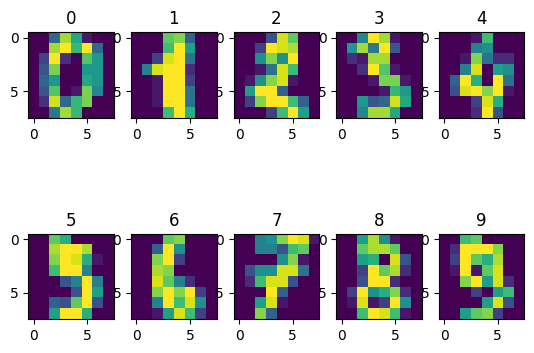

In [ ]:
from sklearn.datasets import load_digits  # 학습 데이터 불러오기
from sklearn.linear_model import Perceptron # 퍼셉트론 모델 불러오기
from matplotlib import pyplot as plt # 데이터 시각화용 라이브러리
X, y = load_digits(return_X_y=True) # 학습 데이터를 로딩한 후, X(특징벡터), y(클래스 레이블)로 구분
rows = 2; cols = 5
fig = plt.figure()
for i in range(10):
  ax = fig.add_subplot(rows, cols, i+1)
  ax.imshow(X[i].reshape(8,8))
  ax.set_title(str(i))
plt.show()

              precision    recall  f1-score   support

     digit 0       1.00      1.00      1.00        53
     digit 1       0.98      0.98      0.98        42
     digit 2       0.91      0.98      0.94        41
     digit 3       0.98      0.96      0.97        52
     digit 4       0.98      1.00      0.99        47
     digit 5       0.91      1.00      0.95        39
     digit 6       1.00      1.00      1.00        43
     digit 7       1.00      0.98      0.99        48
     digit 8       1.00      0.81      0.90        37
     digit 9       0.94      0.96      0.95        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



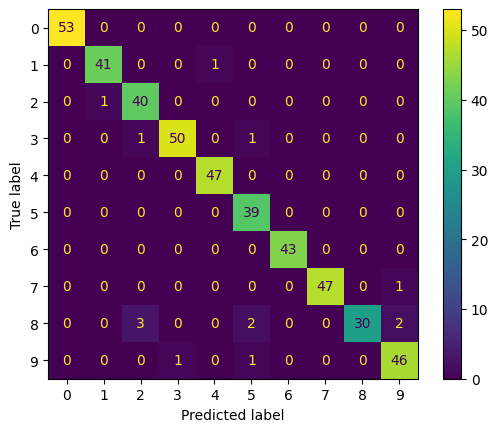

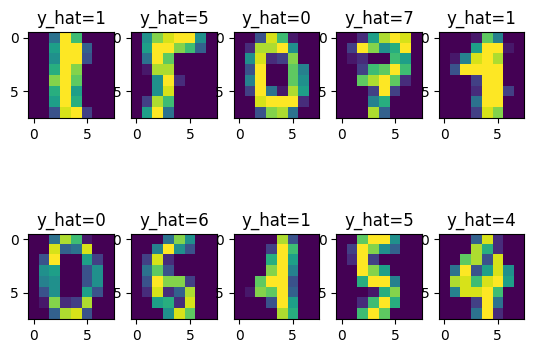

In [ ]:
from sklearn.model_selection import train_test_split
X, y = load_digits(return_X_y=True) # 학습 데이터를 로딩한 후, X(특징벡터), y(클래스 레이블)로 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

clf = Perceptron(tol=1e-3, random_state=0)  # 퍼셉트론 모델을 사용할 개체(clf)를 생성
clf.fit(X_train, y_train) # 퍼셉트론 모델 학습

y_pred = clf.predict(X_test)  # 테스트 데이터에 대하여 결과 예측

from sklearn.metrics import classification_report
target_names = ['digit 0', 'digit 1', 'digit 2', 'digit 3', 'digit 4',
                'digit 5', 'digit 6', 'digit 7', 'digit 8', 'digit 9']
print(classification_report(y_test, y_pred, target_names=target_names))  # 참값(y_test)과 예측값(y_pred)을 대상으로 classification_report를 생성함에 주의

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred) # 참값(y_test)과 예측값(y_pred)을 대상으로 confusion matrix를 생성함에 주의

rows = 2; cols = 5
fig = plt.figure()
fig.tight_layout(w_pad=100)
for i in range(10):
  ax = fig.add_subplot(rows, cols, i+1)
  ax.imshow(X_test[i].reshape(8,8))
  ax.set_title("y_hat=" + str(y_pred[i]))
plt.show()

**Perceptron 구현**

활성화 함수로 sigmoid function을 적용하여 분류 작업을 수행하는 perceptron을 구현해보자. 그런데, 로지스틱 회귀에서는 두 개의 클래스만 존재하는 이진 분류 문제를 다루었는데, 현재 실습에서 다루고 있는 문제에서는 10개의 클래스가 존재한다는 차이가 있다. 여러 개의 클래스가 존재하는 다중 분류상황에서 로지스틱 회귀를 적용하는 방법은 학습하지 않았으므로, 주어진 문제를 이진 분류 문제로 변형하여 해결하도록 하자. "숫자 0"과 "그 외 모든 숫자" 혹은 "숫자 1"과 "그외 모든 숫자"의 식으로 이진 분류 문제로 변경하여 접근해보도록 하겠다.

1.데이터 불러오기

우리가 사용하는 데이터는 numpy의  ndarray 타입이므로  numpy를 이용하여 데이터를 처리할 수 있다. 

2.이진 분류 문제로 변환

이진 분류 문제에 맞게 주어진 데이터를 변형한다. divideData(X, y, targetClass) 함수는 3개의 인자를 받는데 X와 y는 변환하려는 데이터를 의미하고 targetClass는 예를 들어 "숫자 3"과 그외 클래스의 이진 분류 문제로 변환할 경우 "3"의 값으로 부여한다. divideData 함수에서는 먼저 targetClass에 해당하는 관측값의 인덱스를 찾은 후(idx = np.where(y==targetClass)[0]), targetClass에 해당하는 관측값의 클래스는 1로 그외 클래스에 해당하는 관측값의 클래스는 0으로 변경한다. 이 작업을 위해 관측값의 갯수만큼 0으로 채워진 ndarray를 생성하고(newY = np.zeros(len(y))), targetClass에 해당하는 관측값의 클래스를 1로 변경한다(newY[idx] = 1). 

3. 분류기의 구현

활성화함수로 시그모이드 함수를 사용하면 퍼셉트론의 동작과 로지스틱 회귀의 동작이 동일하므로, 로지스틱 회귀의 실습 때 학습하였던 코드를 재활용.

주의 : log 계산할 때 작은 숫자로 인해 발생하는 경고를 해결하기 위하여 log 대신 log1p를 사용하였다. log1p(x)는 log(x+1)과 동일한 연산을 수행한다.

              precision    recall  f1-score   support

     digit 0       0.99      1.00      0.99       404
      Others       0.98      0.89      0.93        46

    accuracy                           0.99       450
   macro avg       0.98      0.94      0.96       450
weighted avg       0.99      0.99      0.99       450



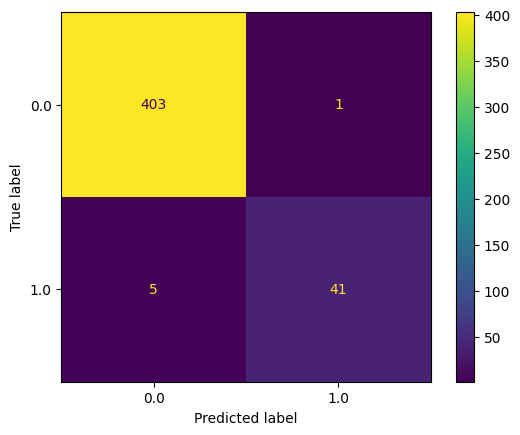

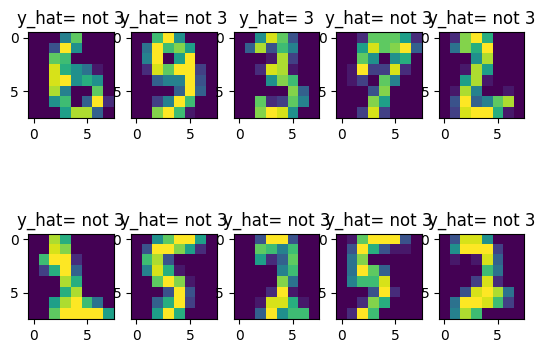

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

# targetClasss로 주어진 숫자와 그 외 숫자 이미지에 대하여
# 훈련용 데이터와 테스트용 데이터로 분할
def divideData(X, y, targetClass):  
  idx = np.where(y==targetClass)[0]
  newY = np.zeros(len(y))
  newY[idx] = 1
  X_train, X_test, y_train, y_test = train_test_split(X, newY, test_size = 0.25, random_state = 42)
  return X_train, X_test, y_train, y_test

def sigmoid(x): # sigmoid 함수 구현
    return 1.0/(1 + np.exp(-x))

# 활성화함수로 sigmoid 함수를 사용하는 이진 분류 문제(targetClass에 속하는 숫자와 그 외 숫자)가 되었으므로
# logistic regression에서 사용한 것과 동일한 loss function 사용
def loss(y, y_hat): 
    loss = np.mean(y*(np.log1p(y_hat)) + (1-y)*np.log1p(1-y_hat))
    return -loss

# 그레디언트(loss function의 편미분 값) 확보
# 아래 함수의 결과물은 negative log likelihood가 아닌 log likelihood를 편미분한 식
def gradients(X, y, y_hat):
    dw = np.dot(X.T, (y-y_hat))
    return dw

# sklearn의 fit() 명령어 구현
# epochs라는 값으로 지정된 횟수만큼 인자를 갱신
# 갱신과정에서는 likelihood를 최대화시키도록 구현되었음에 주의
# w += lr*dw
def train(X_train, y_train, epochs, lr):
    m, n = X_train.shape
    w = np.zeros((n,1))
    y_train = y_train.reshape(m,1)
    for epoch in range(epochs):
        y_hat = sigmoid(np.dot(X_train, w) )
        dw = gradients(X_train, y_train, y_hat)
        w += lr*dw
        l = loss(y_train, sigmoid(np.dot(X_train, w)))
        
    return w

def predict(X, w):
    
    # 예측값 계산
    preds = sigmoid(np.dot(X, w))
    
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

X, y = load_digits(return_X_y=True)
# divideData(X, y, 0)에서 사용하는 세 개의 인자 중 
# 마지막 인자를 0-9중 하나의 숫자로 설정하면
# 설정된 숫자의 클래스 대 그외 클래스의 이진 문제를 해결하게 됨
# 예를 들어 세 번째 인자로 3을 선택하면
# 원래 주어진 학습 데이터를 숫자 3과 그 외 숫자 클래스로 분할한 후
# 이진 문제를 수행

X_train, X_test, y_train, y_test = divideData(X, y, 3)
w = train(X_train, y_train, epochs=100, lr=0.1/len(X_train))
y_pred = predict(X_test, w)

from sklearn.metrics import classification_report
target_names = ['digit 3', 'Others']
print(classification_report(y_test, y_pred, target_names=target_names)) # 참값(y_test)와 예측값(y_pred)을 대상으로 classification_report를 생성함에 주의

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred) # 참값(y_test)와 예측값(y_pred)을 대상으로 confusion matrix를 생성함에 주의


rows = 2; cols = 5
fig = plt.figure()
for i in range(10):
  ax = fig.add_subplot(rows, cols, i+1)
  ax.imshow(X_test[i].reshape(8,8))
  if y_pred[i] == 1:
    ax.set_title("y_hat= 3")
  else:
    ax.set_title("y_hat= not 3")
plt.show()